#### Question:

#### 1.Generate a toy Dataset: (-1, -1), (-2, -2), (-2, -1), (-1, -2), (1, 2), (2, 1), (1, 1), (2, 2). Assume that first 4 are from class1 and the next 4 samples are from class2. Build a logistic regression classifier and draw the separating line (the decision boundary)

#### Solution:

Import Libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Get dataset:

In [2]:
Datapoints = np.array([[-1, -1],[-2, -2],[-2,-1],[-1,-2],[1, 2],[2, 1],[1, 1],[2, 2]])

X = Datapoints[:, 0]
Y = np.array([-1, -1, -1, -1, 1, 1, 1, 1])
thetta = np.array([0, 0, 0])
X = np.hstack((np.ones((X.size, 1)), Datapoints))

print('X = \n', X)
print('Y = \n', Y)

X = 
 [[ 1. -1. -1.]
 [ 1. -2. -2.]
 [ 1. -2. -1.]
 [ 1. -1. -2.]
 [ 1.  1.  2.]
 [ 1.  2.  1.]
 [ 1.  1.  1.]
 [ 1.  2.  2.]]
Y = 
 [-1 -1 -1 -1  1  1  1  1]


In [3]:
def H(thetta, X):
    
    Z = X.dot(thetta)
    H_value = 1 / (1 + np.exp(-Z))
    
    return H_value

Cost function:

In [4]:
m = len(X)

def Cost_function(X, Y, Thetta):
    
    J =  (1/m) * np.sum((Y * np.log(H(thetta, X))) + (1-Y) * np.log(1 - H(thetta, X)))

    return J

Appling Gradient Descent:

In [5]:
def gradient_descent(X, Y, thetta, alpha, iteration):

    Cost_history = [0] * iteration
    
    for iteration in range(iteration):
        
        y_predict = H(thetta, X)
        Gradient = (1/m)*(X.T.dot(y_predict - Y))
        thetta = thetta - (alpha*Gradient)
        Cost = Cost_function(X, Y, thetta)
        Cost_history[iteration] = Cost
        
        if (Cost>Cost_history[iteration-1]):
            alpha = alpha*0.1

    return thetta

In [6]:
thetta_new = gradient_descent(X, Y, thetta, 0.01, 1000)

C = thetta_new[0]
M = thetta_new[1]
T = thetta_new[2]

print('T = ', T)
print('M = ', M)
print('C = ', C)

T =  7.828774767975766
M =  7.828774767975766
C =  -4.950519220212071


Plotting graph:

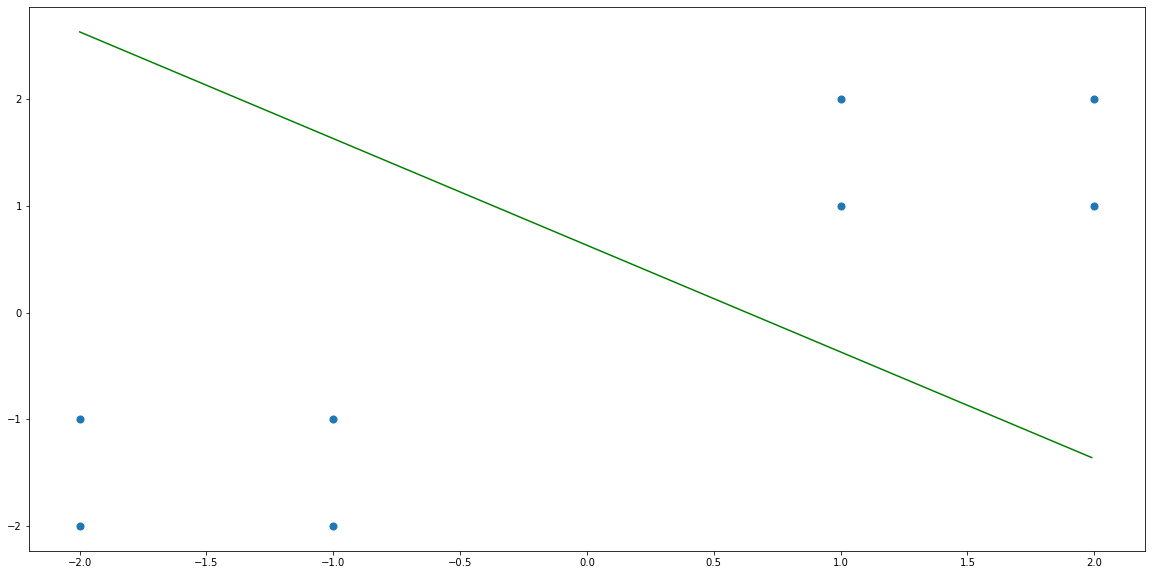

In [7]:
def GetExtremes(Data) :
    
    X = Data[:,0]
    Y = Data[:,1]
    
    return (min(X),max(X),min(Y),max(Y))


def getLine(DirVect,Data):
    
    (c,e1,e2)=DirVect 
    (min_x,max_x,min_y,max_y) = GetExtremes(Data)
    x_new = np.arange(min_x, max_x, 0.01)
    y_new = -(e1*x_new + c)/e2 
    
    return (x_new,y_new)

plt.figure(figsize=(20,10))
plt.scatter(Datapoints[:,0],Datapoints[:,1], s=50)
(x,y) = getLine(thetta_new,Datapoints)
plt.plot(x, y, '-',color='g')